In [1]:
import numpy as np
from matplotlib import pyplot as plt
import simplstyles

In [4]:
plt.style.use('nord-talk-light')

In [2]:
noise_target = 0.1
scalars = [1 / 3, 1 / 3, 1 / 3]

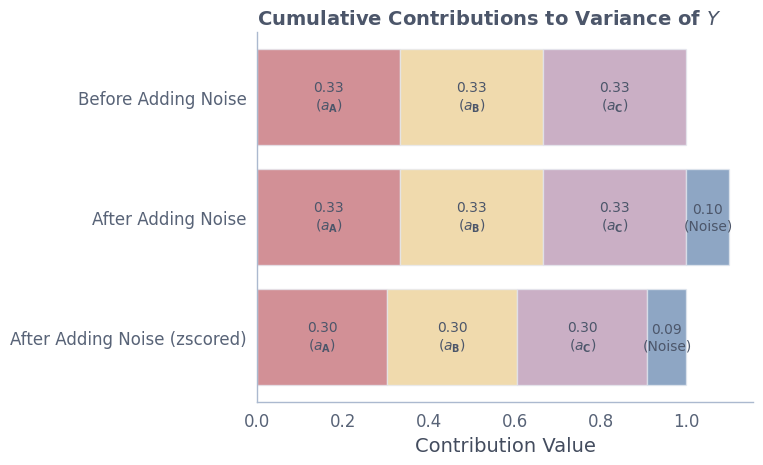

In [5]:
alphas_cumulative = np.cumsum(scalars)
scalars_with_noise = scalars + [noise_target]
alphas_cumulative_with_noise = np.cumsum(scalars_with_noise)
alphas_labels = [f"Alpha {i + 1}" for i in range(len(alphas_cumulative))]

# Plot the third set of bars stacked on top
bars3 = plt.barh(["After Adding Noise (zscored)"], np.array(scalars_with_noise) / sum(scalars_with_noise),
                 left=[0] + list(alphas_cumulative_with_noise[:-1] / 1.1),
                 color=["C3", "C6", "C4", "C0"], alpha=0.7)
for i, (bar, scalar) in enumerate(zip(bars3, (np.array(scalars_with_noise) / sum(scalars_with_noise)))):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height() / 2,
             f"{scalar:.2f}\n({[r"$a_\mathbf{A}$", r"$a_\mathbf{B}$", r"$a_\mathbf{C}$", 'Noise'][i]})",
             ha='center', va='center', fontsize=10)

# Plot the second set of bars stacked on top
bars2 = plt.barh(["After Adding Noise"], scalars_with_noise, left=[0] + list(alphas_cumulative_with_noise[:-1]),
                 color=["C3", "C6", "C4", "C0"], alpha=0.7)
for i, (bar, scalar) in enumerate(zip(bars2, scalars_with_noise)):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height() / 2,
             f"{scalar:.2f}\n({[r"$a_\mathbf{A}$", r"$a_\mathbf{B}$", r"$a_\mathbf{C}$", 'Noise'][i]})",
             ha='center', va='center', fontsize=10)

# Plot the first set of bars
bars1 = plt.barh(["Before Adding Noise"], scalars, left=[0] + list(alphas_cumulative[:-1]), color=["C3", "C6", "C4"],
                 alpha=0.7)
for i, (bar, scalar) in enumerate(zip(bars1, scalars)):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height() / 2,
             f"{scalar:.2f}\n({[r"$a_\mathbf{A}$", r"$a_\mathbf{B}$", r"$a_\mathbf{C}$"][i]})",
             ha='center', va='center', fontsize=10)

plt.title(r"Cumulative Contributions to Variance of $Y$")
plt.xlabel("Contribution Value")
plt.show()